In [2]:
import pandas as pd
import  os
import numpy as np

dataset_path = r"C:\Users\dell\Desktop\MyDocs\Docs\MK\Admission_Predict.csv"
data = pd.read_csv(dataset_path).drop('Serial No.', axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [3]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train_reg, y_test_reg = train_test_split(data.drop(["Chance of Admit "], axis=1),
                                                    data['Chance of Admit '],
                                                    test_size=0.25,
                                                    random_state=20)

def reg_to_clf(col):
  new = [ 1 if val>0.6 else 0 for val in col ]
  return new

y_train_clf, y_test_clf = reg_to_clf(y_train_reg), reg_to_clf(y_test_reg)

In [4]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
328,324,112,4,4.0,3.5,8.77,1
283,321,111,3,2.5,3.0,8.90,1
53,324,112,4,4.0,2.5,8.10,1
148,339,116,4,4.0,3.5,9.80,1
16,317,107,3,4.0,3.0,8.70,0


In [6]:
y_train_reg[:10], y_train_clf[:10]

(328    0.80
 283    0.80
 53     0.72
 148    0.96
 16     0.66
 83     0.92
 324    0.67
 29     0.54
 62     0.54
 49     0.78
 Name: Chance of Admit , dtype: float64,
 [1, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [7]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
model_clf = MLPClassifier(hidden_layer_sizes=(10,10))
model_clf.fit(X_train, y_train_clf)

model_reg = MLPRegressor(hidden_layer_sizes=(10,10))
model_reg.fit(X_train, y_train_reg)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 10))

In [8]:
from sklearn.inspection import permutation_importance
results_clf = permutation_importance(model_clf,
                                 X_train,
                                 y_train_clf,
                                 n_repeats=10,
                                 random_state=40,
                                 scoring='accuracy')

print(results_clf.importances_mean)

[0. 0. 0. 0. 0. 0. 0.]


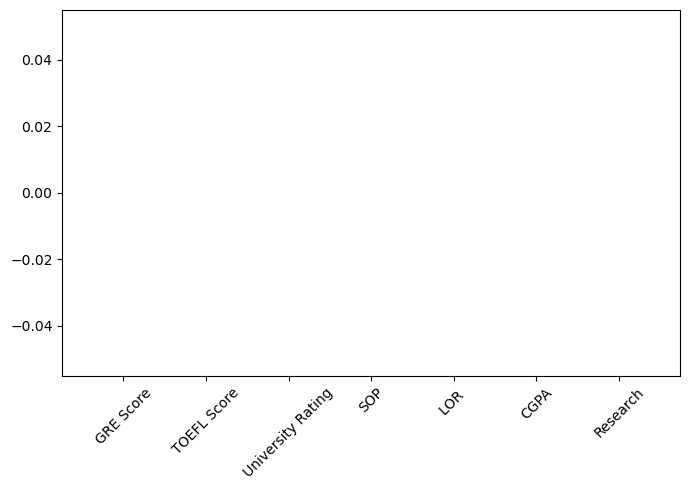

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.bar(X_train.columns, results_clf.importances_mean)
plt.xticks(rotation=45)
plt.tight_layout()

In [10]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

#REGRESSION
model_reg = RandomForestRegressor()
model_reg.fit(X_train, y_train_reg)

#CLASSIFICATION
model_clf = RandomForestClassifier()
model_clf.fit(X_train, y_train_clf)

RandomForestClassifier()

In [12]:
!pip install shap

In [13]:
import shap

explainer_reg = shap.TreeExplainer(model_reg)
shap_values_reg = explainer_reg.shap_values(X_train)


explainer_clf = shap.TreeExplainer(model_clf)
shap_values_clf = explainer_clf.shap_values(X_train)


In [14]:
print("Regression Shap Vaues Shape",shap_values_reg.shape)

pd.DataFrame(shap_values_reg)

Regression Shap Vaues Shape (300, 7)


,0,1,2,3,4,5,6
0,0.017395,0.003853,0.005070,-0.000441,0.003360,0.018355,0.011910
1,0.016086,0.004575,0.000031,-0.001603,-0.002896,0.028070,0.014840
2,0.045549,0.004561,0.007405,0.002478,-0.007946,-0.090220,0.007976
3,0.016840,-0.000100,0.002046,0.000120,0.000743,0.208802,0.003653
4,0.000376,0.000008,0.001155,-0.005033,-0.006400,-0.024874,-0.017029
...,...,...,...,...,...,...,...
295,0.006126,0.004012,-0.008402,0.003162,-0.002251,0.020187,-0.008631
296,0.014774,0.003801,0.002896,-0.001796,0.000623,0.061415,0.010290
297,-0.005581,0.004802,-0.010427,-0.001280,0.008574,-0.029826,-0.003660
298,-0.017469,-0.015264,-0.007161,-0.007604,-0.009982,-0.138415,-0.001902


In [15]:
np.array(shap_values_clf).shape

(300, 7, 2)

In [16]:
np.array(shap_values_clf)[1,:,:].shape

(7, 2)

In [17]:
shap_values_clf = np.array(shap_values_clf)
print("Here there is another dimension, which reporesents the class",shap_values_clf.shape)
pd.DataFrame(shap_values_clf[1,:,:])

Here there is another dimension, which reporesents the class (300, 7, 2)


,0,1
0,-0.064800,0.064800
1,-0.002328,0.002328
2,-0.023959,0.023959
3,-0.002548,0.002548
4,0.000391,-0.000391
5,-0.064462,0.064462
6,-0.018694,0.018694


In [18]:
# Feature importance
import numpy as np
mean_shap_val_clf = np.abs(shap_values_clf[1,:,:]).mean(axis=0)
mean_shap_val_reg = np.abs(shap_values_reg).mean(axis=0)

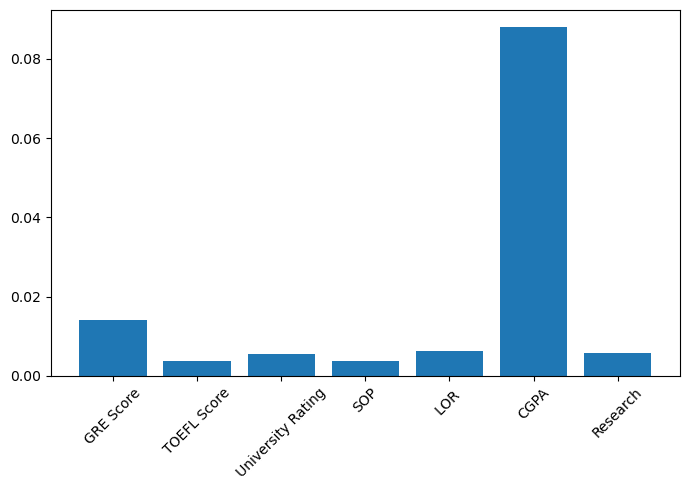

In [20]:
plt.figure(figsize=(7,5))
plt.bar(X_train.columns, mean_shap_val_reg)
plt.xticks(rotation=45)
plt.tight_layout()

In [21]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
model_clf = MLPClassifier(hidden_layer_sizes=(10,10))
model_clf.fit(X_train, y_train_clf)

model_reg = MLPRegressor(hidden_layer_sizes=(10,10))
model_reg.fit(X_train, y_train_reg)

MLPRegressor(hidden_layer_sizes=(10, 10))

In [22]:
explainer_clf = shap.KernelExplainer( model_clf.predict_proba,
                                 shap.kmeans(X_train, 10)
                                 )

shap_values_clf = explainer_clf.shap_values(X_train)


explainer_reg = shap.KernelExplainer( model_reg.predict,
                                 shap.kmeans(X_train, 10)
                                 )

shap_values_reg = explainer_reg.shap_values(X_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


  0%|          | 0/300 [00:00<?, ?it/s]

In [23]:
shap_values_clf

array([[[-1.97768090e-05,  1.97768090e-05],
        [ 3.38317855e-07, -3.38317855e-07],
        [ 6.54105642e-06, -6.54105642e-06],
        ...,
        [-6.54464877e-08,  6.54464878e-08],
        [ 4.60727994e-06, -4.60727994e-06],
        [ 2.95502895e-06, -2.95502895e-06]],

       [[-1.15832338e-05,  1.15832338e-05],
        [ 2.62261451e-07, -2.62261451e-07],
        [-1.84894239e-06,  1.84894239e-06],
        ...,
        [-3.41414589e-06,  3.41414589e-06],
        [ 8.02477452e-06, -8.02477452e-06],
        [ 2.95838105e-06, -2.95838105e-06]],

       [[-1.55317387e-05,  1.55317387e-05],
        [ 2.76462082e-07, -2.76462082e-07],
        [ 5.39655806e-06, -5.39655806e-06],
        ...,
        [-5.46181021e-06,  5.46181021e-06],
        [-1.10532480e-05,  1.10532480e-05],
        [ 2.43513948e-06, -2.43513948e-06]],

       ...,

       [[ 2.86726027e-05, -2.86726027e-05],
        [ 9.90419402e-08, -9.90419403e-08],
        [-1.22017843e-05,  1.22017843e-05],
        ...,
     

In [24]:
# Feature importance
import numpy as np
shap_values_clf = np.array(shap_values_clf)
mean_shap_val_clf = np.abs(shap_values_clf[1,:,:]).mean(axis=0)
mean_shap_val_reg = np.abs(shap_values_reg).mean(axis=0)

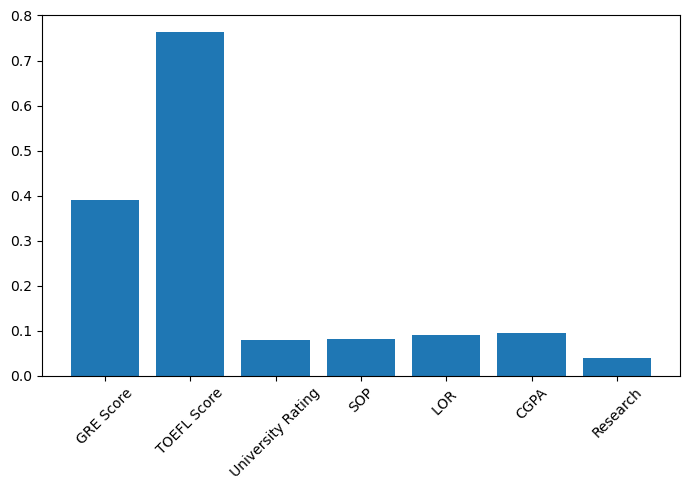

In [26]:
plt.figure(figsize=(7,5))
plt.bar(X_train.columns, mean_shap_val_reg)
plt.xticks(rotation=45)
plt.tight_layout()

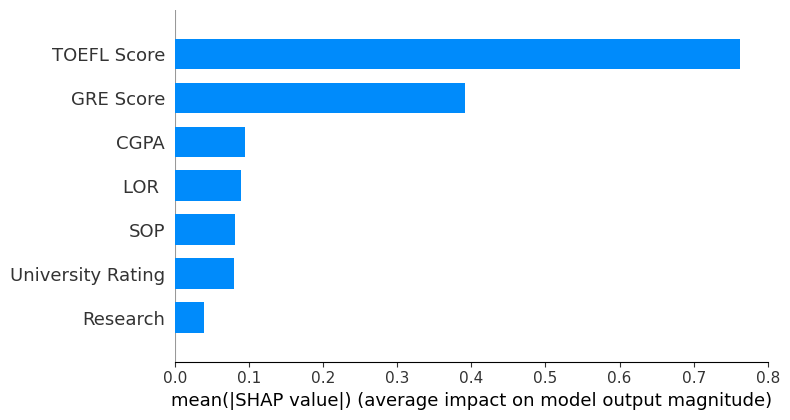

In [27]:
shap.summary_plot(shap_values_reg, X_train, plot_type='bar')


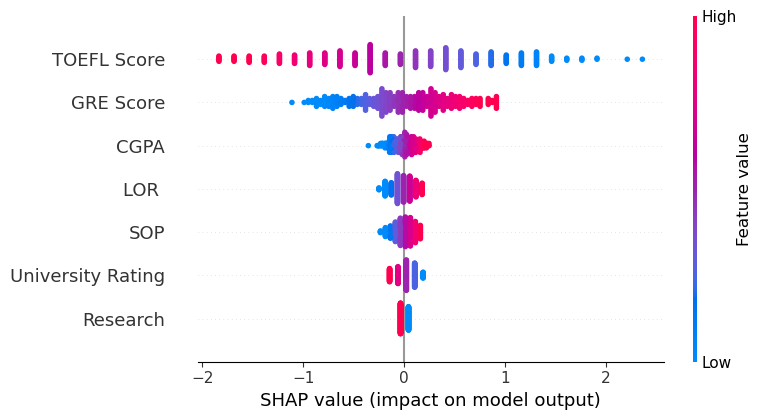

In [28]:
shap.summary_plot(shap_values_reg, X_train, plot_type='dot')

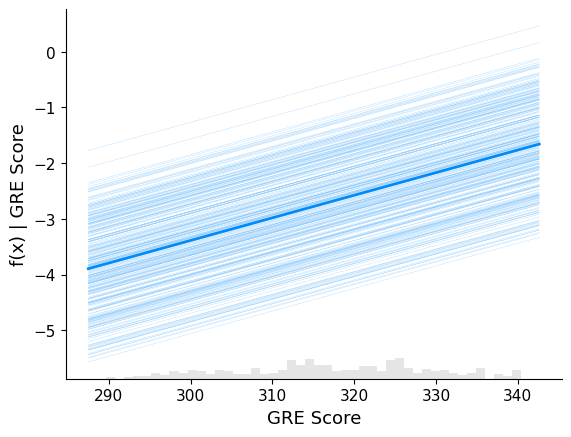

In [29]:
shap.partial_dependence_plot("GRE Score", model_reg.predict, X_train)


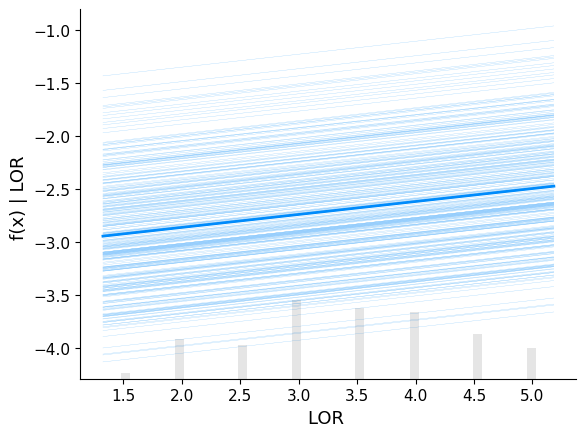

In [30]:
shap.partial_dependence_plot("LOR ", model_reg.predict, X_train)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Shap Values Shape: (7,)


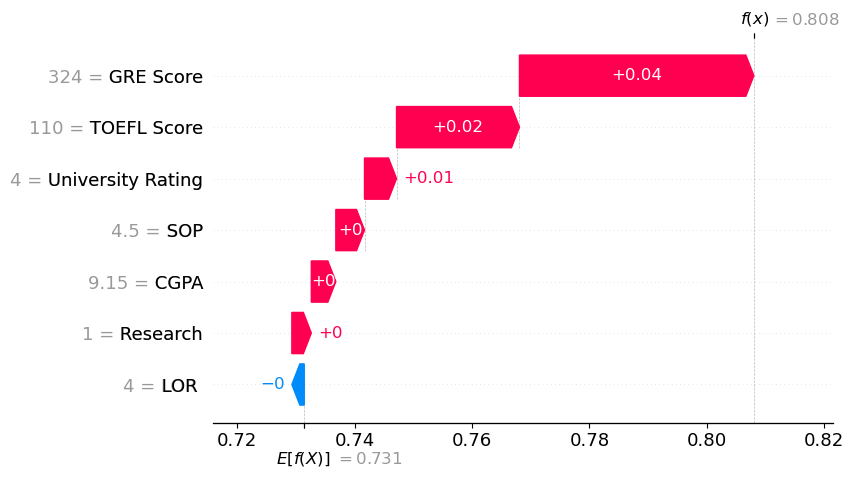

In [31]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train_reg)

explainer = shap.KernelExplainer(model_knn.predict, shap.kmeans(X_train, 10))
test_instance = x_test.iloc[1, :]
shap_values = explainer.shap_values(test_instance)
print(f"Shap Values Shape: {shap_values.shape}")

shap.waterfall_plot(
    shap.Explanation(
        values = shap_values,
        base_values = explainer.expected_value,
        data = x_test.iloc[1, :],
        feature_names = X_train.columns
    )
)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Shap Values Shape: (7,)


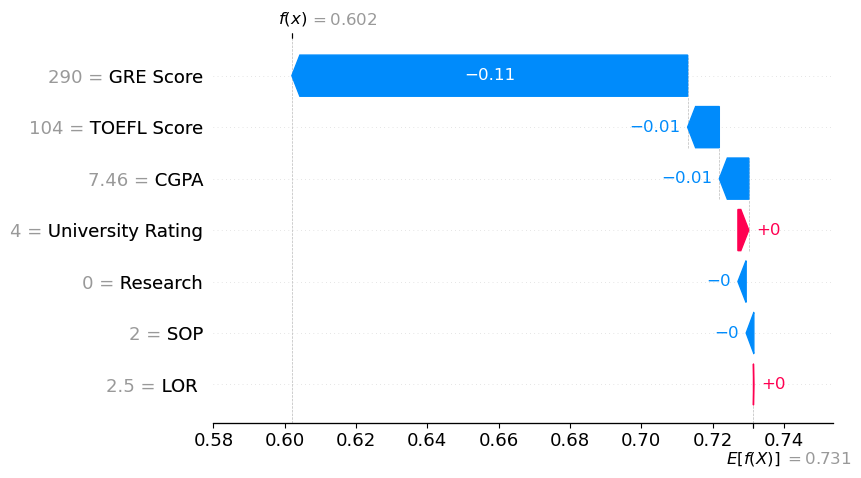

In [32]:
explainer = shap.KernelExplainer(model_knn.predict, shap.kmeans(X_train, 10))
test_instance = x_test.iloc[45, :]
shap_values = explainer.shap_values(test_instance)
print(f"Shap Values Shape: {shap_values.shape}")

shap.waterfall_plot(
    shap.Explanation(
        values = shap_values,
        base_values = explainer.expected_value,
        data = test_instance,
        feature_names = X_train.columns
    )
)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Shap Values Shape: (7,)


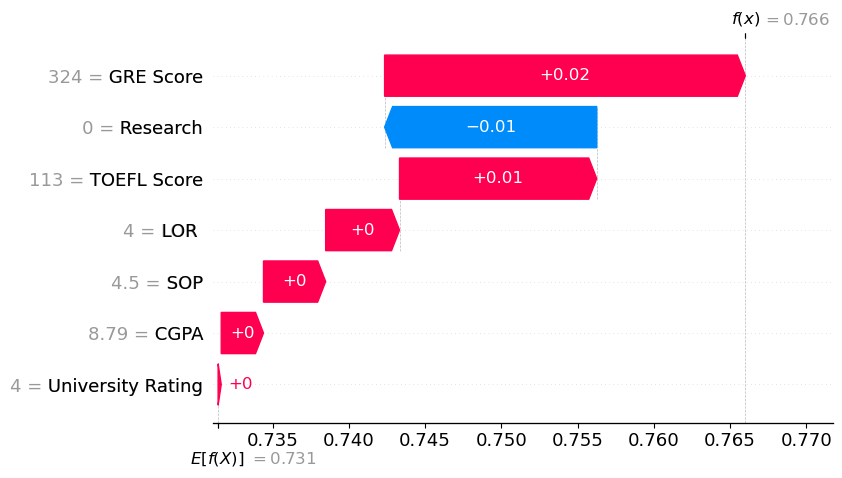

In [33]:
explainer = shap.KernelExplainer(model_knn.predict, shap.kmeans(X_train, 10))
test_instance = x_test.iloc[48, :]
shap_values = explainer.shap_values(test_instance)
print(f"Shap Values Shape: {shap_values.shape}")

shap.waterfall_plot(
    shap.Explanation(
        values = shap_values,
        base_values = explainer.expected_value,
        data = test_instance,
        feature_names = X_train.columns
    )
)

In [34]:
!pip install lime -q

In [35]:
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
import pandas as pd

data = pd.read_csv(dataset_path).drop('Serial No.', axis=1)
data

X_train, x_test, y_train_reg, y_test_reg = train_test_split(data.drop(["Chance of Admit "], axis=1),
                                                    data['Chance of Admit '],
                                                    test_size=0.25,
                                                    random_state=20)

def reg_to_clf(col):
  new = [ 1 if val>0.6 else 0 for val in col ]
  return new

y_train_clf, y_test_clf = reg_to_clf(y_train_reg), reg_to_clf(y_test_reg)


test_instance = x_test.iloc[22, :]

In [36]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train_reg)

model_knn_clf = KNeighborsClassifier()
model_knn_clf.fit(X_train, y_train_clf)

KNeighborsClassifier()

In [37]:
explaner_reg = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

explaner_reg = explaner_reg.explain_instance(
    test_instance.values,
    model_knn.predict
)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


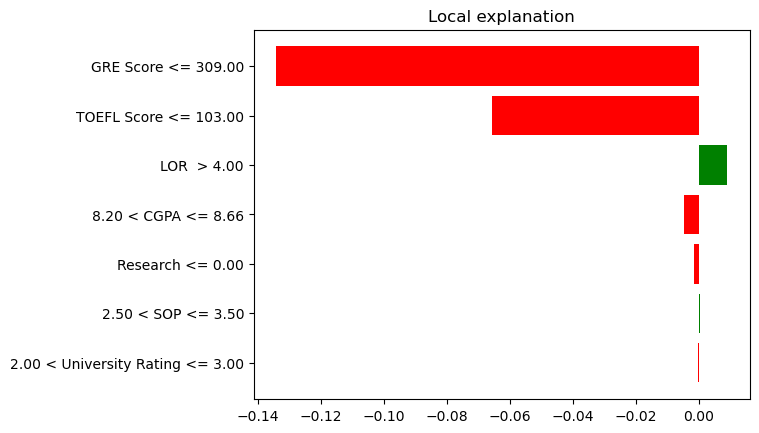

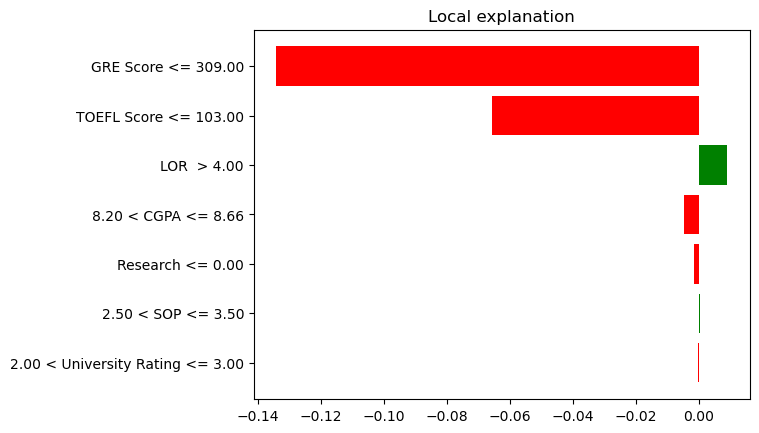

In [38]:
explaner_reg.as_pyplot_figure()


In [39]:
explaner_clf = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    mode='regression'
)

explaner_clf = explaner_clf.explain_instance(
    test_instance.values,
    model_knn_clf.predict_proba
)

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


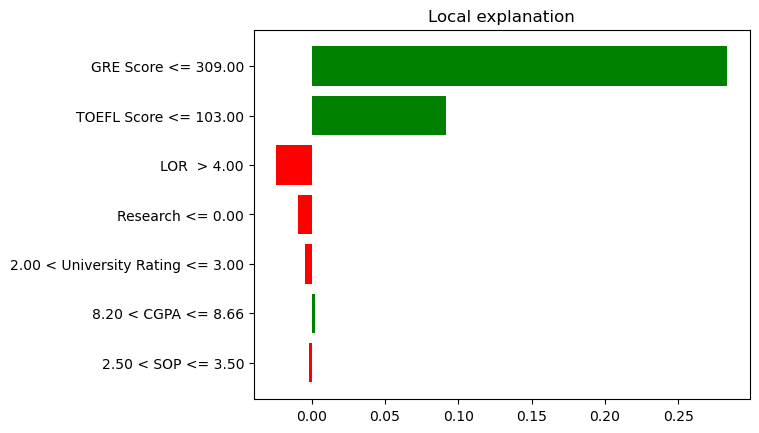

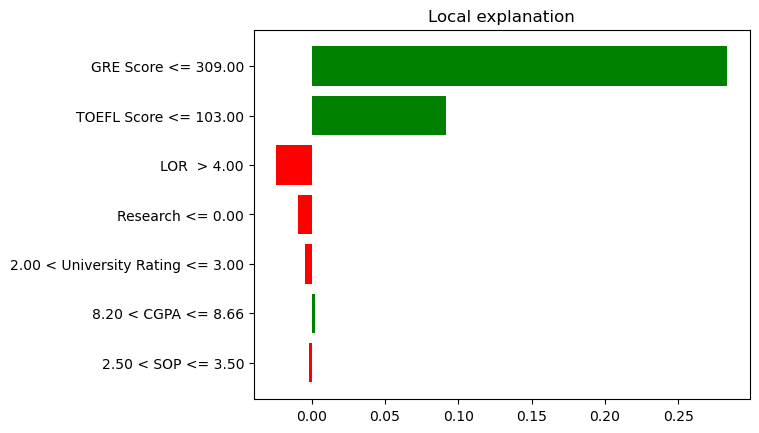

In [40]:
explaner_clf.as_pyplot_figure()


In [41]:
from lime.lime_text import LimeTextExplainer


In [42]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Load a smaller subset of the 20 Newsgroups dataset (using just 2 categories)
categories = ['rec.autos', 'sci.space']
newsgroups = fetch_20newsgroups(subset='all', categories=categories)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)
y_train = ['rec.autos' if val==0 else 'sci.space' for val in y_train]

# Convert the text data to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Naive Bayes classifier and train the model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)



MultinomialNB()

In [43]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(vectorizer, nb_classifier)

In [44]:
pipe.predict_proba([X_train[10]])

array([[0.84815382, 0.15184618]])

In [45]:
newsgroups.target_names


['rec.autos', 'sci.space']

In [46]:
pipe.classes_


array(['rec.autos', 'sci.space'], dtype='<U9')

In [47]:
explainer = LimeTextExplainer(class_names=pipe.classes_, bow=False)
exp = explainer.explain_instance(
      X_train[10],
      pipe.predict_proba,
      num_features=20
)

In [48]:
from IPython.core.display import display, HTML

display(HTML(exp.as_html()))

C:\Users\dell\AppData\Local\Temp\ipykernel_26724\2391083369.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


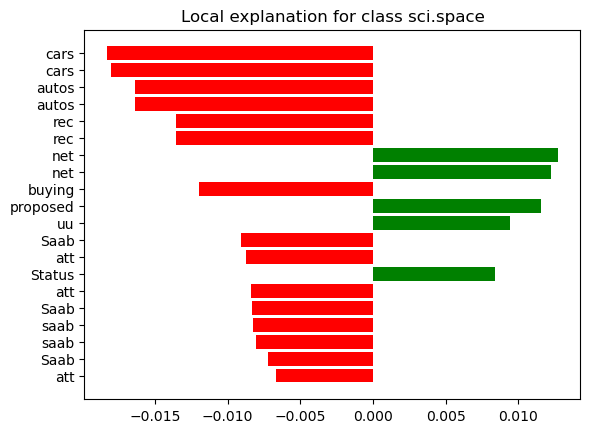

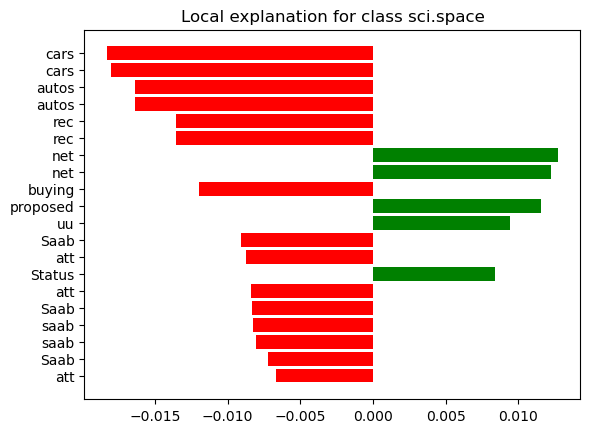

In [49]:
text_instance = X_train[10]
predicted_class = pipe.predict([text_instance])[0]
exp.as_pyplot_figure()

In [50]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1. Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Flatten y_train and y_test to 1D arrays
y_train = y_train.flatten()
y_test = y_test.flatten()

# 2. Preprocess the data (filter for binary classification - "airplane" and "automobile")
X_train = X_train[(y_train == 0) | (y_train == 1)]  # "airplane" and "automobile" classes (0 and 1)
y_train = y_train[(y_train == 0) | (y_train == 1)]

X_test = X_test[(y_test == 0) | (y_test == 1)]
y_test = y_test[(y_test == 0) | (y_test == 1)]

# 3. Resize the images to 100x100
def resize_images(images, size=(100, 100)):
    resized_images = []
    for img in images:
        img_pil = Image.fromarray(img)
        img_resized = img_pil.resize(size)
        resized_images.append(np.array(img_resized))
    return np.array(resized_images)

X_train = resize_images(X_train)
X_test = resize_images(X_test)

# Normalize the images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 6. Train the model with batch size 16
history = model.fit(X_train, y_train, epochs=3, batch_size=16, validation_data=(X_test, y_test))

# 7. Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AttributeError: module 'ml_dtypes' has no attribute 'float8_e3m4'
Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 90ms/step - accuracy: 0.7560 - loss: 0.4848 - val_accuracy: 0.8315 - val_loss: 0.3478
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.8742 - loss: 0.2926 - val_accuracy: 0.9045 - val_loss: 0.2255
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 93ms/step - accuracy: 0.9087 - loss: 0.2255 - val_accuracy: 0.8920 - val_loss: 0.2815
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.8973 - loss: 0.2540
Test accuracy: 0.8920000195503235


In [51]:
history.history

{'accuracy': [0.8123000264167786, 0.8770999908447266, 0.9156000018119812],
 'loss': [0.4075755476951599, 0.2849840223789215, 0.20617251098155975],
 'val_accuracy': [0.8314999938011169, 0.9045000076293945, 0.8920000195503235],
 'val_loss': [0.34780991077423096, 0.22554950416088104, 0.28151145577430725]}

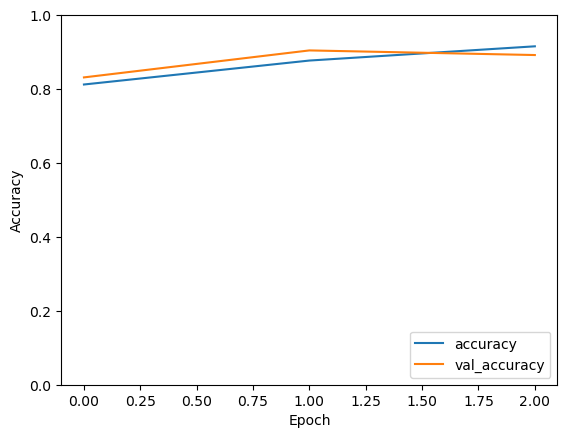

In [52]:
# Optionally, visualize the training process
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Airplane


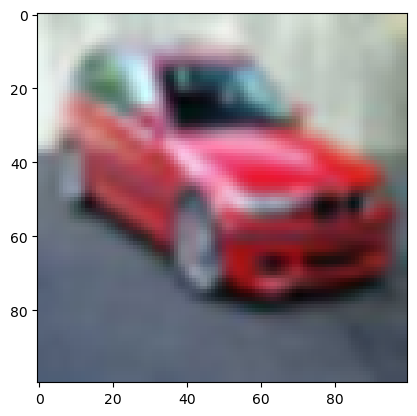

In [53]:
sample = X_train[262]
prediction = model.predict(np.expand_dims(sample, axis=0))
print('Airplane' if prediction > 0.5 else 'Automobile')
plt.imshow(sample)

In [54]:
from lime.lime_image import LimeImageExplainer

explainer = LimeImageExplainer()

explaination = explainer.explain_instance(
    sample,
    model.predict,
    num_samples = 500
)

temp, _ = explaination.get_image_and_mask(
    explaination.top_labels[0],
    hide_rest=True
)

  0%|          | 0/500 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━

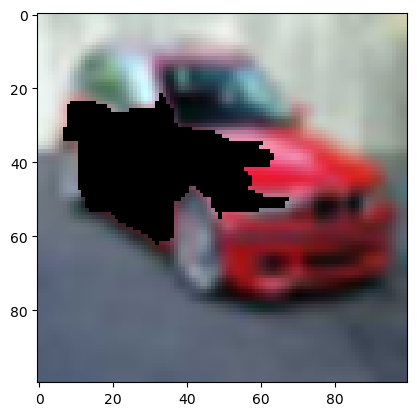

In [55]:
plt.imshow(temp)